<a href="https://colab.research.google.com/github/Di4naS/Parcial-IA-2-corte/blob/main/Regresi%C3%B3n_Logistica_Entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller: Regresión Logistica**

## **Fase 1: Definición del Problema de Negocio**

**Objetivo general:** Predecir si una persona fuma o no fuma basándose en sus características personales y médicas.

**Contexto:** Las aseguradoras necesitan identificar factores de riesgo en sus clientes. Fumar es uno de los hábitos que más incrementa el costo del seguro médico, por lo que detectar patrones asociados con el tabaquismo puede ayudar a estimar el riesgo y ajustar las políticas de prevención o precios.

## **Tipo de problema**

* **Tipo de Machine Learning:** Clasificación binaria
* **Algoritmo:** Regresión Logística
* **Variable objetivo (Y):** smoker [yes = 1 (fuma)], [no = 0 (no fuma)]
* **Variables predictoras (X):** age, bmi, children, region, sex, charges

## **Métrica de Éxito**

* **Accuracy (Exactitud):** Porcentaje total de predicciones correctas.
* **Precision y Recall:** Para evaluar qué tan bien el modelo detecta a las personas fumadoras sin confundirlas con no fumadores.
* **F1-Score:** Promedio entre precisión y exhaustividad.
* **Matriz de confusión:** Para visualizar los aciertos y errores.

## **Justificación:**
Porque el hábito de fumar influye directamente en los costos y el riesgo médico, lo que resulta relevante para las aseguradoras.

### **Variables incluidas**

*   **age:** Edad del asegurado. Personas más mayores suelen tener más riesgo de enfermedades, lo que incrementa el costo del seguro.
*   **sex:** Género de la persona (male/female). Puede tener cierta influencia en los cálculos médicos y del seguro. Comunmente 1=Male y 2=Female.
*   **bmi:** Índice de Masa Corporal (BMI). Es una medida del peso en relación con la estatura. Un BMI elevado se asocia con mayor riesgo de enfermedades (diabetes, hipertensión, etc.), y por ende, con seguros más caros.
*   **children:** Número de hijos/dependientes cubiertos por el seguro.
*   **smoker:** Indica si la persona fuma (yes/no). Este es uno de los factores más influyentes, ya que fumar incrementa mucho el costo del seguro.
*   **region:** Región de residencia en EE. UU. (noreste, sureste, suroeste, noroeste). Diferencias geográficas pueden reflejarse en costos médicos y de seguros.
* **charges:** Costo anual del seguro médico en dólares.
Esta es la variable objetivo que queremos predecir. Significa literalmente:
 Los cargos/costos en dólares que una persona debe pagar por su seguro médico anual. Es decir, cuánto le cobra la aseguradora al cliente en función de sus características personales y de salud.

In [ ]:
# --- Importación de librerías ---

# Manejo y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y métricas (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## **Fase 2**: Recolección de Datos

In [ ]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv("Medical-Insurance.csv")

# Ver las primeras filas para confirmar que se cargó bien
df.head()

# Tamaño del dataset
print("Filas y columnas:", df.shape)

# Información general de los tipos de datos
df.info()

# Comprobar valores nulos
df.isnull().sum()

Filas y columnas: (2772, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2772 non-null   object 
 1   Sex       2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   Children  2772 non-null   int64  
 4   Smoker    2772 non-null   object 
 5   Region    2772 non-null   int64  
 6   Charges   2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


,0
Age,0
Sex,0
BMI,0
Children,0
Smoker,0
Region,0
Charges,0


## **Interpretación:**
* Las variables Sex, Children y Region son numéricas enteras codificadas.
* BMI y Charges son numéricas continuas.
* Smoker (nuestra variable objetivo) y Age están en formato object, por lo tanto, antes de modelar será necesario convertirlas a formato numérico.
* En particular, parece que Age, aunque debería ser numérica, está en formato texto, así que habrá que convertirla con pd.to_numeric().

## **Fase 3**: Análisis Exploratorio de Datos (EDA)

## 3.1. Inspección Inicial

In [ ]:
# Vemos las primeras filas, los tipos de datos y un resumen estadístico.
print("Primeras 10 filas del dataset:")
print(df.head(10))

print("\nInformación general del DataFrame:")
df.info()

print("\nResumen estadístico de las variables numéricas:")
df.describe()

Primeras 10 filas del dataset:
  Age  Sex     BMI  Children Smoker  Region      Charges
0  19    1  27.900         0      1       3  16884.92400
1  18    2  33.770         1      0       4   1725.55230
2  28    2  33.000         3      0       4   4449.46200
3  33    2  22.705         0      0       1  21984.47061
4  32    2  28.880         0      0       1   3866.85520
5  31    1  25.740         0      ?       4   3756.62160
6  46    1  33.440         1      0       4   8240.58960
7  37    1  27.740         3      0       1   7281.50560
8  37    2  29.830         2      0       2   6406.41070
9  60    1  25.840         0      0       1  28923.13692

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2772 non-null   object 
 1   Sex       2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   

,Sex,BMI,Children,Region,Charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,1.507215,30.701349,1.101732,2.559885,13261.369959
std,0.500038,6.129449,1.214806,1.130761,12151.768945
min,1.000000,15.960000,0.000000,1.000000,1121.873900
25%,1.000000,26.220000,0.000000,2.000000,4687.797000
50%,2.000000,30.447500,1.000000,3.000000,9333.014350
75%,2.000000,34.770000,2.000000,4.000000,16577.779500
max,2.000000,53.130000,5.000000,4.000000,63770.428010


## **Conclusiones de la inspección inicial**

* No hay valores nulos, pero sí hay un valor incorrecto en Smoker (“?”).
* La columna Age debe transformarse a numérica.
* Las variables presentan rangos y dispersiones esperadas, sin anomalías evidentes.
* El dataset está listo para pasar a un análisis más visual (gráficos) y luego a la fase de limpieza/preparación.

# **Fase 4: Limpieza y Preparación de los Datos**

In [ ]:
# Hacer una copia del dataset original
df_clean = df.copy()

In [ ]:
# Reemplazar "?" por NaN en las columnas problemáticas
df_clean["Age"] = df_clean["Age"].replace("?", np.nan)
df_clean["Smoker"] = df_clean["Smoker"].replace("?", np.nan)

### **4.2 Conversión de tipos de datos**

Convertimos las columnas que deberían ser numéricas.
En este caso:

* Age debe ser numérica (está como texto).
* Smoker debe ser numérica binaria (0 = no fuma, 1 = fuma).

In [ ]:
# Convertir tipos de datos
df_clean["Age"] = pd.to_numeric(df_clean["Age"])
df_clean["Smoker"] = pd.to_numeric(df_clean["Smoker"])

### **4.3 Comprobación general después de limpiar**

In [ ]:
print("\nInformación general del DataFrame limpio:")
df_clean.info()

print("\nValores nulos:")
print(df_clean.isnull().sum())


Información general del DataFrame limpio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2768 non-null   float64
 1   Sex       2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   Children  2772 non-null   int64  
 4   Smoker    2765 non-null   float64
 5   Region    2772 non-null   int64  
 6   Charges   2772 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB

Valores nulos:
Age         4
Sex         0
BMI         0
Children    0
Smoker      7
Region      0
Charges     0
dtype: int64


### **4.4 Eliminación de filas con valores faltantes**

In [ ]:
df_clean = df_clean.dropna()
print("\nDimensiones del dataset limpio:", df_clean.shape)


Dimensiones del dataset limpio: (2761, 7)


### **4.5 Verificación final**

In [ ]:
print("\nEstadísticas descriptivas del dataset limpio:")
print(df_clean.describe())


Estadísticas descriptivas del dataset limpio:
               Age          Sex          BMI     Children       Smoker  \
count  2761.000000  2761.000000  2761.000000  2761.000000  2761.000000   
mean     39.118798     1.507063    30.715737     1.100326     0.203912   
std      14.093567     0.500041     6.133103     1.214527     0.402977   
min      18.000000     1.000000    15.960000     0.000000     0.000000   
25%      26.000000     1.000000    26.220000     0.000000     0.000000   
50%      39.000000     2.000000    30.495000     1.000000     0.000000   
75%      51.000000     2.000000    34.800000     2.000000     0.000000   
max      64.000000     2.000000    53.130000     5.000000     1.000000   

            Region       Charges  
count  2761.000000   2761.000000  
mean      2.561753  13274.759301  
std       1.130557  12158.758072  
min       1.000000   1121.873900  
25%       2.000000   4718.203550  
50%       3.000000   9377.904700  
75%       4.000000  16577.779500  
max   

In [ ]:
print(df_clean.isnull().sum())

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64


# **5. Visualización de Distribuciones**

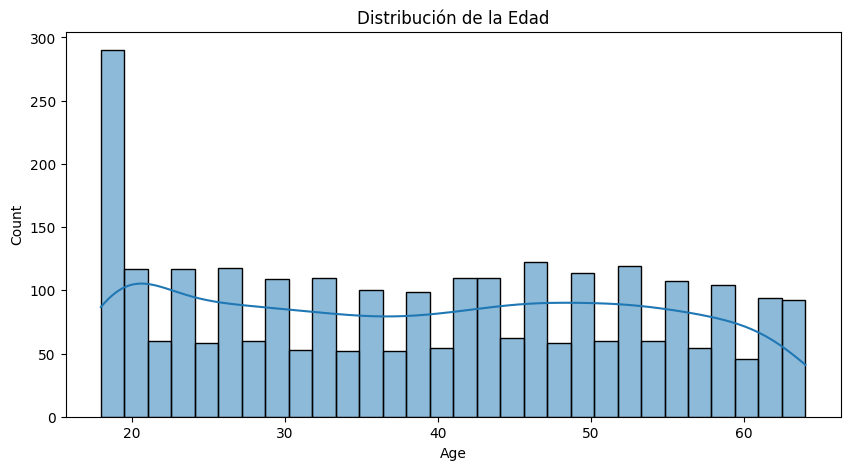

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['Age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

* La línea azul suavizada (kernel density) muestra la tendencia general de distribución.

* El dataset tiene más jóvenes que adultos mayores, lo que puede afectar cómo el modelo aprende la relación entre edad y tabaquismo.

* La distribución no está sesgada fuertemente hacia un extremo, salvo por ese grupo de 18–20 años.

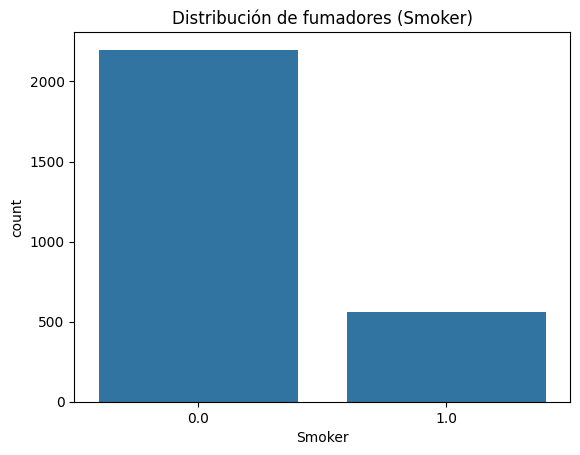

In [ ]:
sns.countplot(x='Smoker', data=df_clean)
plt.title('Distribución de fumadores (Smoker)')
plt.show()

* La gráfica muestra la distribución de la variable objetivo “Smoker”, que indica si una persona fuma (1) o no fuma (0). Se observa que la mayoría de las personas en el conjunto de datos no fuman, mientras que solo una minoría son fumadores.

* Esto refleja un desequilibrio en la variable objetivo, donde los no fumadores superan ampliamente a los fumadores (aproximadamente una proporción de 4 a 1). Este desbalance es importante porque puede afectar el rendimiento del modelo de Regresión Logística, ya que el algoritmo podría inclinarse a predecir la clase mayoritaria (no fumadores) con más frecuencia.

* Por ello, será necesario tenerlo en cuenta durante el entrenamiento y la evaluación del modelo, utilizando métricas adecuadas como precisión, recall, F1-score o la curva ROC, y, si es necesario, aplicar técnicas de balanceo de clases para mejorar la capacidad del modelo de identificar correctamente a los fumadores.

# **5.1. Búsqueda de Correlaciones**

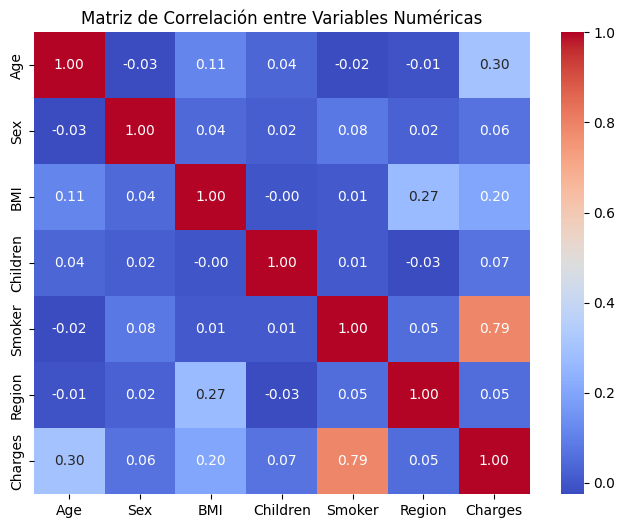

In [ ]:
# Calcular la matriz de correlación
corr = df_clean.corr()

# Visualizar con un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


### **Principales observaciones**

* “**Smoker**” y “**Charges**”:  **0.79**, Es la correlación más fuerte del mapa. Indica que las personas que fuman tienden a tener mayores costos médicos.

Esto tiene coherencia con el contexto del negocio (el tabaquismo aumenta los riesgos de salud).

* “**Age**” y “**Charges**”: **0.30**, Correlación positiva moderada: los costos médicos aumentan con la edad, lo cual también es lógico. Aunque no es muy alta, podría tener cierto peso en el modelo.

* “**BMI**” y “**Charges**” : 0.20, Correlación baja pero positiva: las personas con mayor índice de masa corporal tienden a tener gastos médicos más altos.

* Las demás correlaciones (por ejemplo, entre “Sex”, “Children”, “Region”) son muy bajas o cercanas a cero, lo que indica que no hay una relación lineal fuerte entre esas variables y las demás.

### **Conclusión:**

* La matriz muestra que no hay multicolinealidad fuerte (no hay variables predictoras que estén demasiado relacionadas entre sí, lo cual es bueno para la regresión logística).

* La variable Smoker tiene una fuerte relación con Charges, lo que valida el sentido del análisis y del dataset.

* Otras variables como Age y BMI aportan información adicional, aunque su correlación sea moderada.

# **Fase 6: Preparación y Preprocesamiento de Datos**

## **6.1. Manejo de Outliers**

En la regresión logística pueden afectar los coeficientes y la frontera de decisión, haciendo que el modelo:

* Sea más sensible a valores extremos,
* Y, en consecuencia, clasifique mal ciertos casos.

Por eso, eliminar o revisar outliers en variables continuas como BMI o Charges sigue siendo buena práctica antes de entrenar el modelo.

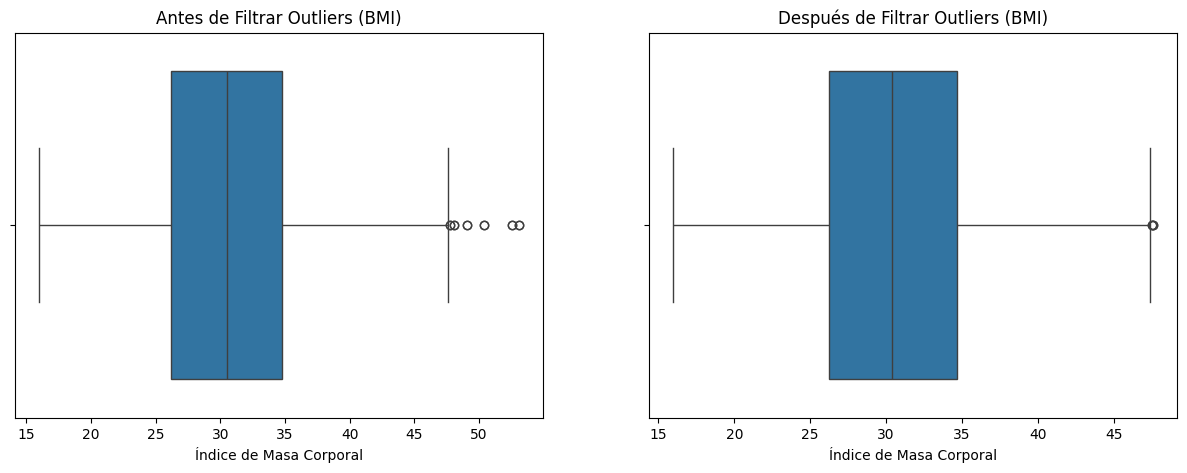

Filas antes: 2761, después: 2749


In [ ]:
# --- Eliminación de outliers en BMI ---

Q1 = df_clean['BMI'].quantile(0.25)
Q3 = df_clean['BMI'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtramos solo valores razonables
df_preprocessed = df_clean[(df_clean['BMI'] >= limite_inferior) & (df_clean['BMI'] <= limite_superior)]

# Visualización antes y después
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_clean['BMI'])
plt.title("Antes de Filtrar Outliers (BMI)")
plt.xlabel("Índice de Masa Corporal")

plt.subplot(1,2,2)
sns.boxplot(x=df_preprocessed['BMI'])
plt.title("Después de Filtrar Outliers (BMI)")
plt.xlabel("Índice de Masa Corporal")

plt.show()

print(f"Filas antes: {len(df_clean)}, después: {len(df_preprocessed)}")


La variable BMI (Índice de Masa Corporal) fue analizada para detectar valores atípicos mediante el método del rango intercuartílico (IQR).

* En el gráfico de la izquierda (antes de filtrar), se observan varios puntos fuera de los límites del bigote derecho del boxplot, lo que indica la presencia de outliers, es decir, personas con valores de índice corporal anormalmente altos en comparación con el resto del conjunto de datos.

* Después del filtrado (gráfico de la derecha), estos valores extremos fueron eliminados, manteniendo únicamente los registros dentro del rango considerado razonable (entre el límite inferior y superior definidos por el IQR).

Esto permite que el modelo de regresión logística trabaje con datos más representativos, evitando que valores extremos sesguen el análisis o afecten la estimación de los coeficientes.

--- Age ---
Límites: -11.50 a 88.50
Filas restantes: 2761

--- BMI ---
Límites: 13.35 a 47.67
Filas restantes: 2749

--- Charges ---
Límites: -13084.24 a 34388.94
Filas restantes: 2456



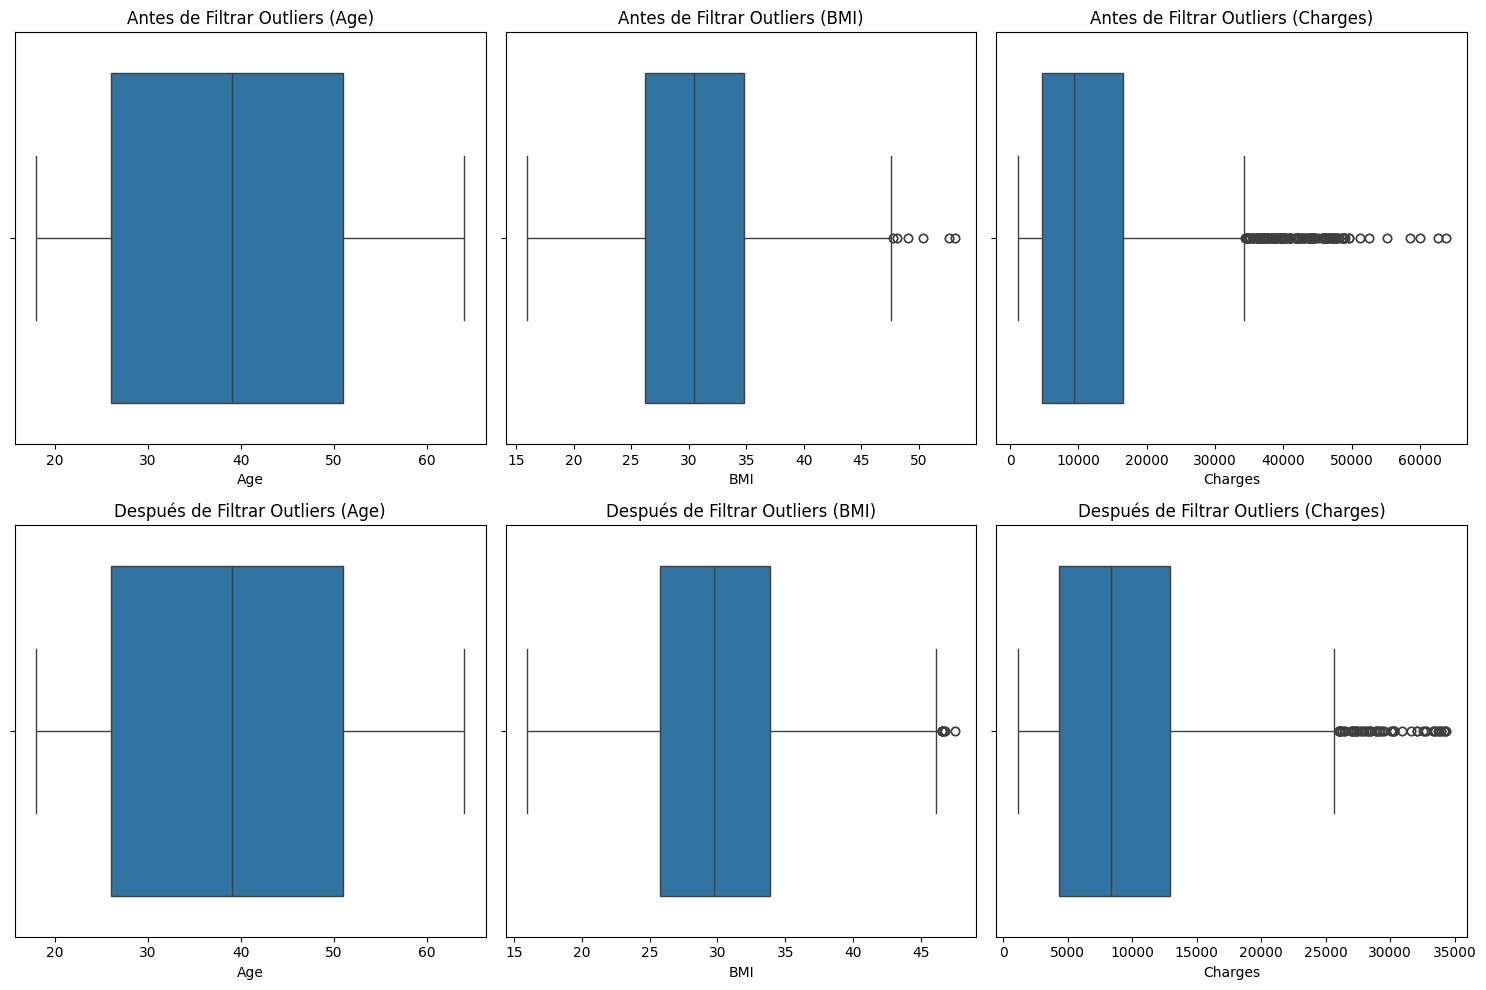

In [ ]:
# --- Detección y eliminación de outliers usando la regla de Tukey (IQR) ---
variables = ['Age', 'BMI', 'Charges']
df_preprocessed = df_clean.copy()

for var in variables:
    Q1 = df_preprocessed[var].quantile(0.25)
    Q3 = df_preprocessed[var].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar valores dentro del rango
    df_preprocessed = df_preprocessed[(df_preprocessed[var] >= limite_inferior) &
                                      (df_preprocessed[var] <= limite_superior)]

    print(f"--- {var} ---")
    print(f"Límites: {limite_inferior:.2f} a {limite_superior:.2f}")
    print(f"Filas restantes: {len(df_preprocessed)}\n")

# --- Visualización antes y después para cada variable ---
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_clean[var])
    plt.title(f"Antes de Filtrar Outliers ({var})")
    plt.xlabel(var)

    plt.subplot(2, 3, i+4)
    sns.boxplot(x=df_preprocessed[var])
    plt.title(f"Después de Filtrar Outliers ({var})")
    plt.xlabel(var)

plt.tight_layout()
plt.show()


En el análisis de las variables numéricas Age, BMI y Charges, se aplicó el método del rango intercuartílico (IQR) para detectar y eliminar valores atípicos extremos.
El objetivo fue mejorar la calidad de los datos y evitar que casos anómalos afectaran el rendimiento del modelo de regresión logística.

* En los boxplots superiores (antes de filtrar) se observan varios puntos fuera de los límites del rango aceptable, especialmente en las variables BMI y Charges, donde existen valores muy elevados respecto a la mayoría de los registros. Estos representan individuos con índices de masa corporal o costos médicos considerablemente superiores al promedio del conjunto.

* Tras aplicar el filtrado (gráficos inferiores), los outliers fueron reducidos o eliminados, y las distribuciones se muestran más compactas y simétricas.
En particular:

* Age no presentaba valores atípicos significativos, por lo que casi no sufrió cambios.

* BMI redujo varios puntos extremos altos, quedando dentro de un rango más realista (entre ~20 y 45).

* Charges mostró la mayor cantidad de outliers, los cuales fueron acotados, eliminando casos con costos extremadamente altos (>35.000).

En conclusión, el filtrado permitió obtener un conjunto de datos más limpio y equilibrado, conservando la información relevante mientras se reducen los sesgos causados por valores atípicos.
Esto es especialmente importante en la regresión logística, ya que los outliers pueden distorsionar la estimación de los coeficientes y afectar la precisión del modelo.

In [ ]:
print("\n--- Resumen general de eliminación de outliers ---")
print(f"Tamaño original: {df_clean.shape}")
print(f"Tamaño después de filtrar: {df_preprocessed.shape}")
print(f"Filas eliminadas: {df_clean.shape[0] - df_preprocessed.shape[0]}")


--- Resumen general de eliminación de outliers ---
Tamaño original: (2761, 7)
Tamaño después de filtrar: (2456, 7)
Filas eliminadas: 305


# **Fase 7: Separación de Características (X) y Objetivo (y)**

In [ ]:
# --- Separación de características (X) y variable objetivo (y) ---

X = df_preprocessed.drop(columns=['Smoker'])
y = df_preprocessed['Smoker']

# Verificación rápida
print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (2456, 6)
Dimensiones de y: (2456,)


* En X quedaron 6 variables predictoras (todas menos “Smoker”).
* En Y está solo la variable objetivo “Smoker”, con el mismo número de filas.

In [ ]:
import pandas as pd

# Aplicar One-Hot Encoding a 'Sex' y 'Region'
X = pd.get_dummies(X, columns=['Sex', 'Region'], drop_first=True)

# drop_first=True elimina la primera categoría de cada variable para evitar multicolinealidad.
# Por ejemplo, en 'Sex', solo se mantiene 'Sex_2', si es 0, implica que es Sex_1 (mujer).

# El DataFrame X ahora tendrá columnas como:
# 'Age', 'BMI', 'Children', 'Charges', 'Sex_2', 'Region_2', 'Region_3', 'Region_4'

# **Fase 8: Selección y Entrenamiento del Modelo (Regresión Logística)**

## **8.1. División de Datos (Train-Test Split)**

In [ ]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de X_train: (1964, 8)
Tamaño de X_test: (492, 8)
Tamaño de y_train: (1964,)
Tamaño de y_test: (492,)


## **8.2. Escalado de Características**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columnas numéricas continuas a escalar
cols_to_scale = ['Age', 'BMI', 'Charges', 'Children']

# Crear escalador
scaler = StandardScaler()

# Ajustar solo con X_train
scaler.fit(X_train[cols_to_scale])

# Crear copias de X_train y X_test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Escalar únicamente las columnas continuas
X_train_scaled[cols_to_scale] = scaler.transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])

print("Forma de X_train_scaled:", X_train_scaled.shape)
print("Forma de X_test_scaled:", X_test_scaled.shape)


Forma de X_train_scaled: (1964, 8)
Forma de X_test_scaled: (492, 8)


## **8.3. Entrenamiento del Modelo**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar con los datos escalados
model.fit(X_train_scaled, y_train)

print("¡Modelo de Regresión Logística entrenado exitosamente!")

¡Modelo de Regresión Logística entrenado exitosamente!


# **9. Evaluación del modelo**

## **9.1. Predicciones con el modelo**

In [ ]:
# --- Predicciones ---
y_pred = model.predict(X_test_scaled)

# También podemos obtener las probabilidades (útil para curva ROC)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

## **9.2. Métricas de evaluación**

In [ ]:
# --- Calcular métricas ---
accuracy = accuracy_score(y_test, y_pred)
matriz_conf = confusion_matrix(y_test, y_pred)
reporte = classification_report(y_test, y_pred)

print(f"Exactitud del modelo: {accuracy:.4f}")
print("\nMatriz de confusión:\n", matriz_conf)
print("\nReporte de clasificación:\n", reporte)

Exactitud del modelo: 0.9451

Matriz de confusión:
 [[412  16]
 [ 11  53]]

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       428
         1.0       0.77      0.83      0.80        64

    accuracy                           0.95       492
   macro avg       0.87      0.90      0.88       492
weighted avg       0.95      0.95      0.95       492



**Exactitud** (Accuracy = 0.9451)

* El modelo acierta aproximadamente el 94.5% de todas las predicciones.
* Tu modelo usa edad, BMI, hijos, región y costo del seguro para adivinar si alguien fuma o no.

**Análisis de la Clase de Interés (Fumadores, Clase 1.0):**

* **Precision (0.77)**: De todas las veces que el modelo predijo que alguien fuma, acertó el 77% de las veces.

* **Recall (0.83)**: De todas las personas que realmente fuman, el modelo logró detectar al 83%.

## **9.3. Visualización de la matriz de confusión**

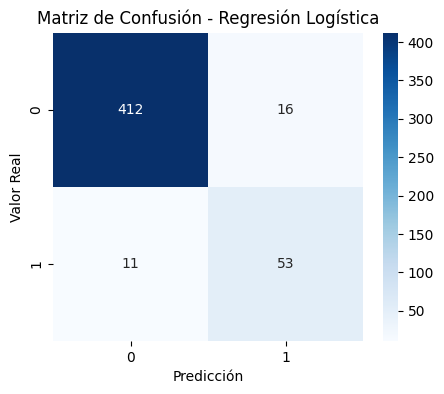

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(matriz_conf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

* 412 (TN): 412 personas que no fumaban y el modelo predijo correctamente “no fumador”.

* 16 (FP):  16 personas que no fumaban, pero el modelo dijo “fumador” (error).

* 11 (FN): 11 personas que sí fumaban, pero el modelo dijo “no fumador” (error).

* 53 (TP): 53 personas que sí fumaban y el modelo predijo correctamente “fumador”.

**Interpretación:**

* El modelo predice muy bien a los no fumadores, pero debido al desbalance de clases (más no fumadores que fumadores), los errores se concentran en la clase minoritaria (fumadores).

* La variable Charges fue especialmente útil para diferenciar fumadores de no fumadores, lo que tiene sentido porque fumar aumenta los costos médicos.

**Limitaciones:**

* Desbalance de clases: menos personas fumadoras que no fumadoras.

* Algunos atributos como Region y Children aportan poco al modelo.

* Con datos más recientes o más variados, la precisión podría mejorar.

# **Prueba del modelo con un dato nuevo**

In [ ]:
# 1. Crear el DataFrame del nuevo paciente
paciente_nuevo = pd.DataFrame({
    'Age': [50],
    'Sex': [2],      # 1 para female, 2 para male (según tu codificación)
    'BMI': [31.0],
    'Children': [1],
    'Region': [4],   # 1:NE, 2:NW, 3:SW, 4:SE
    'Charges': [25000]
})

print("Características del nuevo paciente:")
print(paciente_nuevo)

Características del nuevo paciente:
   Age  Sex   BMI  Children  Region  Charges
0   50    2  31.0         1       4    25000


In [ ]:
# 2. Aplicar One-Hot Encoding (igual que en el entrenamiento)
# Usamos las mismas columnas categóricas: 'Sex' y 'Region'
paciente_procesado = pd.get_dummies(paciente_nuevo, columns=['Sex', 'Region'], drop_first=True)

# 3. Alinear las columnas
# ¡Crucial! Aseguramos que el nuevo dato tenga exactamente las mismas columnas que el modelo espera.
# Las columnas que no existan en 'paciente_procesado' se añadirán y se rellenarán con 0.
paciente_procesado = paciente_procesado.reindex(columns=X_train.columns, fill_value=0)

# 4. Escalar las características con el MISMO scaler
# ¡MUY IMPORTANTE! Usamos solo .transform(), NUNCA .fit() en datos nuevos.
columnas_a_escalar = ['Age', 'BMI', 'Charges', 'Children']
paciente_procesado[columnas_a_escalar] = scaler.transform(paciente_procesado[columnas_a_escalar])

print("\nCaracterísticas del paciente nuevo (procesadas y listas para el modelo):")
print(paciente_procesado)


Características del paciente nuevo (procesadas y listas para el modelo):
        Age       BMI  Children   Charges  Sex_2  Region_2  Region_3  Region_4
0  0.784872  0.140458 -0.084861  2.150385      0         0         0         0


In [ ]:
# 5. Predecir la clase
prediccion_clase = model.predict(paciente_procesado)
resultado_clase = "Fumador" if prediccion_clase[0] == 1 else "No Fumador"

# 6. Predecir la probabilidad
prediccion_prob = model.predict_proba(paciente_procesado)
prob_no_fumador = prediccion_prob[0][0]
prob_fumador = prediccion_prob[0][1]

In [ ]:
print(f"\n--- Resultado de la Predicción ---")
print(f"El modelo predice que el paciente es: {resultado_clase}")
print(f"Probabilidad de ser 'No Fumador' (Clase 0): {prob_no_fumador:.2%}")
print(f"Probabilidad de ser 'Fumador' (Clase 1):    {prob_fumador:.2%}")


--- Resultado de la Predicción ---
El modelo predice que el paciente es: No Fumador
Probabilidad de ser 'No Fumador' (Clase 0): 72.73%
Probabilidad de ser 'Fumador' (Clase 1):    27.27%


* El **modelo predice** que el paciente **no** es **fumador** con una probabilidad del **72.73%**, pero no es completamente seguro, ya que existe un **27.27%** de posibilidad de que sí lo sea. Esto indica que algunas características del paciente (como edad, BMI o gastos médicos altos) sugieren un riesgo de fumar, aunque no suficiente para cambiar la predicción.

* En el **contexto de seguros**, este resultado se interpreta como un caso ambiguo o de alerta, que podría llevar a acciones como pedir exámenes adicionales, hacer preguntas sobre hábitos de vida o ajustar la prima del seguro.